## Imports

In [366]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data

In [357]:
df_identity = pd.read_csv('../data/raw/train_identity.csv')
df_transaction = pd.read_csv('../data/raw/train_transaction.csv')

## Functions

In [367]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [94]:
df_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [95]:
df_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Fraud Distribution

In [184]:
# Total Count of entries
total = df_transaction.count()["TransactionID"]

In [96]:
df_transaction.isFraud.unique()

array([0, 1])

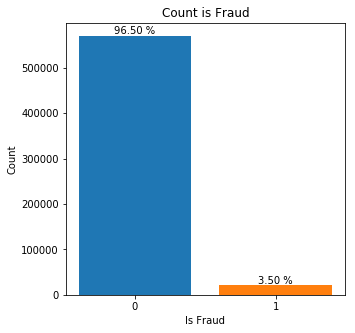

In [97]:
x = df_transaction.isFraud.unique()
y = df_transaction.groupby(df_transaction.isFraud).count()["TransactionID"]

fig, ax = plt.subplots(figsize=(5,5))

ax.bar(x, y, color=['tab:blue', 'tab:orange']);
ax.set_xticks(range(0,2));
ax.set_xticklabels(x);
ax.set_title("Count is Fraud");
ax.set_xlabel("Is Fraud");
ax.set_ylabel("Count");

rects = ax.patches

# Make some labels.
labels = [(y[0] / y.sum() * 100), (y[1] / y.sum() * 100)]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, "{:.2f} %".format(label),
            ha='center', va='bottom')

## Transaction Amounts

In [98]:
# Transaction amounts
df_transaction.TransactionAmt.describe()

count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

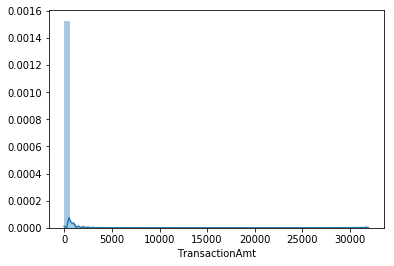

In [99]:
sns.distplot(df_transaction['TransactionAmt']);

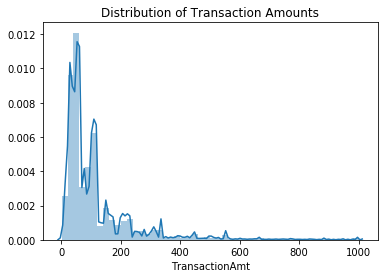

In [100]:
plot = sns.distplot(df_transaction[df_transaction['TransactionAmt'] <= 1000]['TransactionAmt'])
plot.set_title("Distribution of Transaction Amounts");

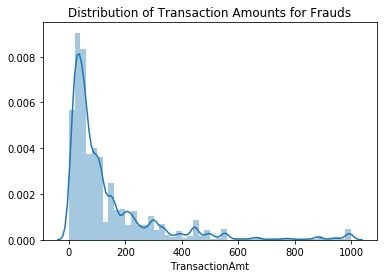

In [101]:
plot = sns.distplot(df_transaction[(df_transaction['TransactionAmt'] <= 1000) & (df_transaction.isFraud == 1)]['TransactionAmt'])
plot.set_title("Distribution of Transaction Amounts for Frauds");

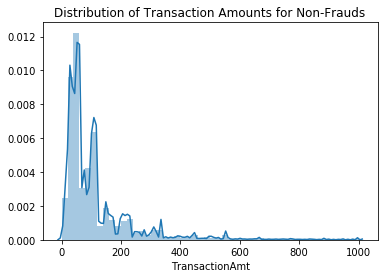

In [102]:
plot = sns.distplot(df_transaction[(df_transaction['TransactionAmt'] <= 1000) & (df_transaction.isFraud == 0)]['TransactionAmt'])
plot.set_title("Distribution of Transaction Amounts for Non-Frauds");

## ProductCD

-> Categorical

In [103]:
df_transaction.ProductCD.unique()

array(['W', 'H', 'C', 'S', 'R'], dtype=object)

In [104]:
df_transaction.groupby(df_transaction.ProductCD).count()["TransactionID"]

ProductCD
C     68519
H     33024
R     37699
S     11628
W    439670
Name: TransactionID, dtype: int64

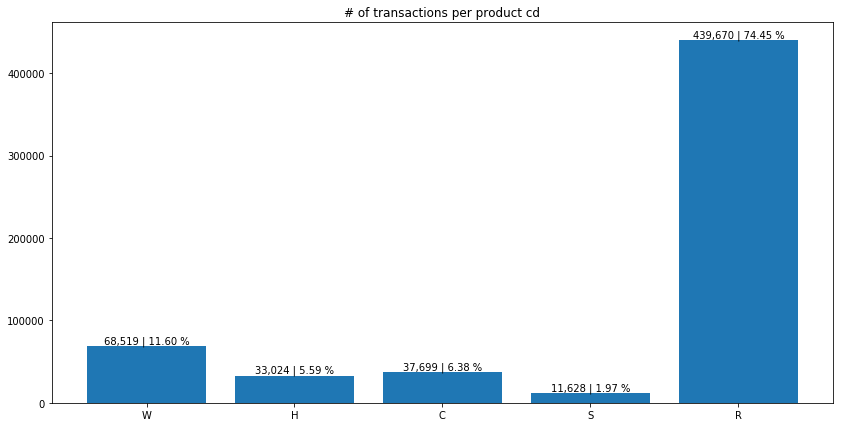

In [105]:
fig, ax = plt.subplots(figsize=(14,7))

x = df_transaction.ProductCD.unique()
y = df_transaction.groupby(df_transaction.ProductCD).count()["TransactionID"]

ax.bar(x, y);
ax.set_title("# of transactions per product cd");

rects = ax.patches

# Make some labels.
labels = y

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, "{:,} | {:.2f} %".format(label, (label / y.sum() * 100)),
            ha='center', va='bottom')

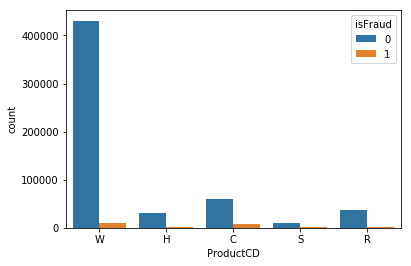

In [106]:
g1 = sns.countplot(x='ProductCD', hue='isFraud', data=df_transaction)

In [107]:
tmp = pd.crosstab(df_transaction['ProductCD'], df_transaction['isFraud'], normalize='index') * 100
tmp 

isFraud,0,1
ProductCD,,
C,88.312731,11.687269
H,95.233769,4.766231
R,96.217406,3.782594
S,94.100447,5.899553
W,97.960061,2.039939


## Card Features

-> Categorical

In [108]:
df_cards = df_transaction.loc[:, 'card1':'card6']

In [109]:
df_cards.head()

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit


In [110]:
df_cards.describe()

,card1,card2,card3,card5
count,590540.000000,581607.000000,588975.000000,586281.000000
mean,9898.734658,362.555488,153.194925,199.278897
std,4901.170153,157.793246,11.336444,41.244453
min,1000.000000,100.000000,100.000000,100.000000
25%,6019.000000,214.000000,150.000000,166.000000
50%,9678.000000,361.000000,150.000000,226.000000
75%,14184.000000,512.000000,150.000000,226.000000
max,18396.000000,600.000000,231.000000,237.000000


In [111]:
df_cards.isna().sum()

card1       0
card2    8933
card3    1565
card4    1577
card5    4259
card6    1571
dtype: int64

In [112]:
for col in df_cards.columns:
    print("{} nunique: {}".format(col, df_cards[col].nunique()))

card1 nunique: 13553
card2 nunique: 500
card3 nunique: 114
card4 nunique: 4
card5 nunique: 119
card6 nunique: 4


In [113]:
df_cards.dtypes

card1      int64
card2    float64
card3    float64
card4     object
card5    float64
card6     object
dtype: object

In [114]:
df_cards.head(10)

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit
5,5937,555.0,150.0,visa,226.0,debit
6,12308,360.0,150.0,visa,166.0,debit
7,12695,490.0,150.0,visa,226.0,debit
8,2803,100.0,150.0,visa,226.0,debit
9,17399,111.0,150.0,mastercard,224.0,debit


__1, 2, 5 seem to be numerical values__


In [115]:
df_cards_numerical = df_cards.loc[:,["card1", "card2", "card3", "card5"]]

In [116]:
df_cards_numerical.describe()

,card1,card2,card3,card5
count,590540.000000,581607.000000,588975.000000,586281.000000
mean,9898.734658,362.555488,153.194925,199.278897
std,4901.170153,157.793246,11.336444,41.244453
min,1000.000000,100.000000,100.000000,100.000000
25%,6019.000000,214.000000,150.000000,166.000000
50%,9678.000000,361.000000,150.000000,226.000000
75%,14184.000000,512.000000,150.000000,226.000000
max,18396.000000,600.000000,231.000000,237.000000


In [117]:
df_cards_numerical.card3.unique()

array([150., 117., 185., 143., 144., 163., 146., 191., 162., 119., 147.,
       100., 135., 137., 138., 102., 213., 106., 214., 148., 210., 203.,
       194., 141., 225.,  nan, 188., 193., 208., 133., 223., 134., 153.,
       131., 200., 149., 116., 222., 220., 197., 129., 206., 195., 204.,
       127., 142., 111., 159., 118., 229., 217., 212., 227., 166., 189.,
       120., 171., 190., 105., 130., 170., 180., 177., 132., 109., 198.,
       121., 183., 215., 156., 207., 186., 167., 152., 199., 219., 202.,
       126., 182., 123., 107., 221., 124., 231., 157., 136., 128., 168.,
       101., 108., 125., 211., 164., 160., 161., 179., 155., 169., 205.,
       209., 226., 174., 176., 181., 224., 122., 201., 175., 139., 172.,
       114., 228., 184., 151., 173.])

In [118]:
df_cards_numerical.card2.isna().sum()

8933

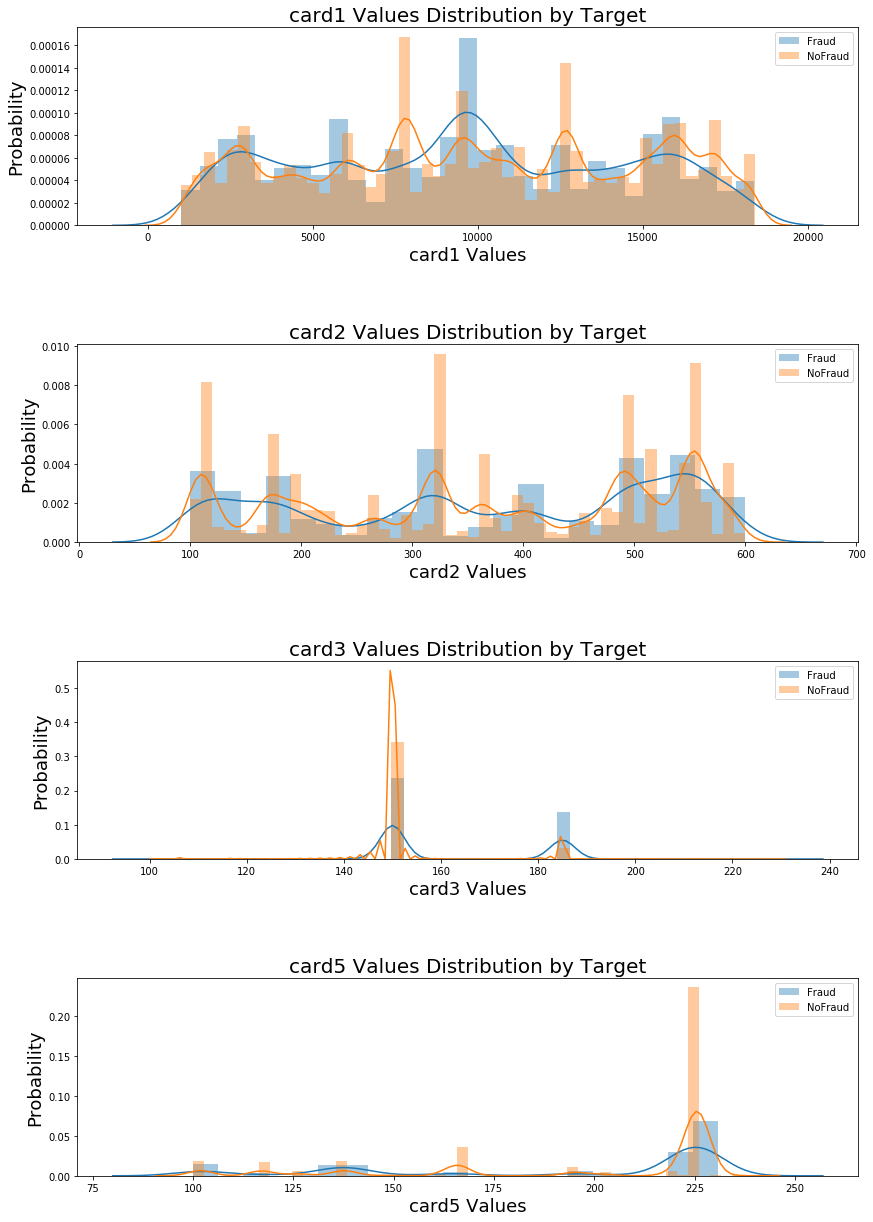

In [119]:
plt.figure(figsize=(14,22))
plt.tight_layout();

for i, col in enumerate(df_cards_numerical.columns, start=1):
    grid = "41" + str(i)
    plt.subplot(int(grid))
    g = sns.distplot(df_transaction[df_transaction['isFraud'] == 1][col].dropna(), label='Fraud')
    g = sns.distplot(df_transaction[df_transaction['isFraud'] == 0][col].dropna(), label='NoFraud')
    g.legend()
    g.set_title("{} Values Distribution by Target".format(col), fontsize=20)
    g.set_xlabel("{} Values".format(col), fontsize=18)
    g.set_ylabel("Probability", fontsize=18)
    
plt.subplots_adjust(hspace = 0.6, top = 0.85)

In [120]:
df_transaction.groupby(df_transaction.card4).count()["TransactionID"]

card4
american express      8328
discover              6651
mastercard          189217
visa                384767
Name: TransactionID, dtype: int64

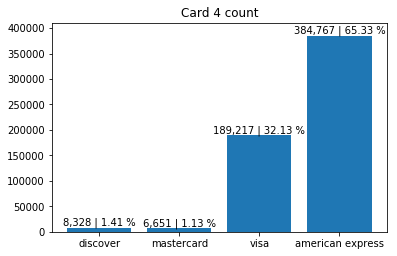

In [121]:
# Card 4
fig, ax = plt.subplots()

x = df_transaction.card4.dropna().unique()
y = df_transaction.groupby("card4").count()["TransactionID"]

ax.bar(x, y);


rects = ax.patches;

# Make some labels.
labels = y

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, "{:,} | {:.2f} %".format(label, (label / y.sum() * 100)),
            ha='center', va='bottom')
    
ax.set_title("Card 4 count");
ax.set_ylim(top=410000)

plt.subplots_adjust(hspace = 0.6, top = 0.85)

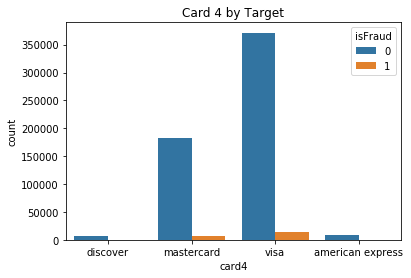

In [122]:
plot = sns.countplot(x="card4", hue="isFraud", data=df_transaction)
plot.set_title("Card 4 by Target");


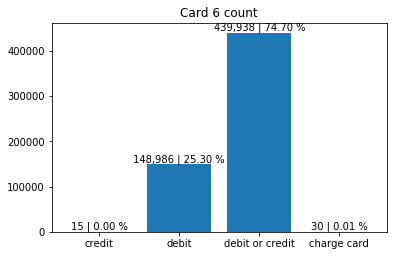

In [123]:
# Card 6
fig, ax = plt.subplots()

x = df_transaction.card6.dropna().unique()
y = df_transaction.groupby("card6").count()["TransactionID"]

ax.bar(x, y);


rects = ax.patches;

# Make some labels.
labels = y

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, "{:,} | {:.2f} %".format(label, (label / y.sum() * 100)),
            ha='center', va='bottom')
    
ax.set_title("Card 6 count");
#ax.set_ylim(top=500000);

plt.subplots_adjust(hspace = 0.6, top = 0.85)

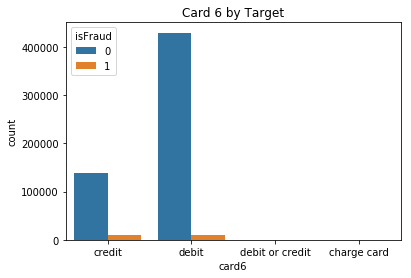

In [125]:
plot = sns.countplot(x="card6", hue="isFraud", data=df_transaction)
plot.set_title("Card 6 by Target");


## Address Features

-> Categorical (id of address?)

In [127]:
df_transaction[["addr1", "addr2"]].head()

,addr1,addr2
0,315.0,87.0
1,325.0,87.0
2,330.0,87.0
3,476.0,87.0
4,420.0,87.0


In [128]:
df_transaction[["addr1", "addr2"]].describe()

,addr1,addr2
count,524834.000000,524834.000000
mean,290.733794,86.800630
std,101.741072,2.690623
min,100.000000,10.000000
25%,204.000000,87.000000
50%,299.000000,87.000000
75%,330.000000,87.000000
max,540.000000,102.000000


In [129]:
df_transaction[["addr1", "addr2"]].isna().sum()

addr1    65706
addr2    65706
dtype: int64

In [130]:
df_transaction.addr1.nunique()

332

In [131]:
df_transaction.addr2.nunique()

74

In [132]:
sorted(df_transaction.groupby("addr1").count()["TransactionID"], reverse=True)[:10]

[46335, 42751, 42020, 39870, 26287, 23078, 20827, 20141, 16105, 15243]

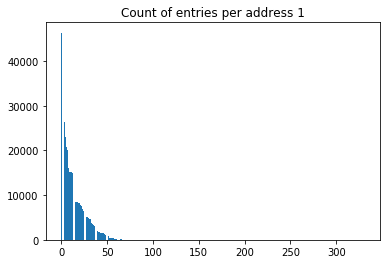

In [133]:
plt.bar(range(0,df_transaction.addr1.nunique()), sorted(df_transaction.groupby("addr1").count()["TransactionID"], reverse=True));
plt.title('Count of entries per address 1');

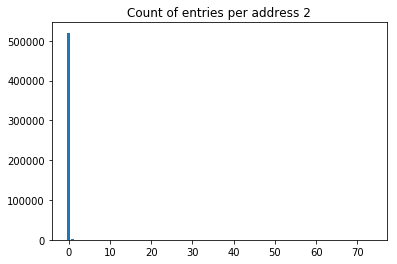

In [134]:
plt.bar(range(0,df_transaction.addr2.nunique()), sorted(df_transaction.groupby("addr2").count()["TransactionID"], reverse=True));
plt.title('Count of entries per address 2');

__All addresses with less than 5000 (addr1) and 50 (addr2) will be put into the category others__

In [309]:
# All with less than 5000 -> Other
df_transaction.loc[df_transaction.addr1.isin(df_transaction.addr1.value_counts()[df_transaction.addr1.value_counts() <= 5000].index), 'addr1'] = "Others"


In [310]:
df_transaction.loc[df_transaction.addr2.isin(df_transaction.addr2.value_counts()[df_transaction.addr2.value_counts() <= 50].index), 'addr2'] = "Others"

In [335]:
def plot_cnt_distribution(df, col):
    
    tmp = pd.crosstab(df_transaction[col], df_transaction['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    #tmp.sort_values("NoFraud", ascending=False, inplace=True)
    
    relative = pd.DataFrame(df[col].value_counts())
    relative = relative.assign(relative = relative[col] / total)
    relative = relative.reset_index()
    relative = relative[["index", "relative"]]
    relative.columns = [str(col), "relative"]
    tmp = pd.merge(tmp, relative)
    tmp = tmp.sort_values('relative', ascending=False)
    
    plt.figure(figsize=(20,10));
    plt.suptitle('{} Distribution'.format(col), fontsize=24)
    plt.subplot(211)
    g1 = sns.countplot(x=col, data=df, order=list(tmp[col].values), label="Count of {}".format(col));
    gt = g1.twinx()
    gt = sns.pointplot(x=col, y='Fraud', data=tmp, order=list(tmp[col].values),
                   color='black', legend=True, label="Nr. of Frauds")
    g1.set_title('Countplot of addresses');
    g1.set_xticklabels(g1.get_xticklabels(), rotation=45);
    #g1.legend()

    for p in g1.patches:
            height = p.get_height()
            g1.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format(height/total*100),
                    ha="center",fontsize=12) 

    plt.subplot(212)
    g1 = sns.countplot(x=col, hue='isFraud', data=df, order=list(tmp[col].values));
    g1.set_title('Countplot with target fraud yes / no');
    g1.set_xticklabels(g1.get_xticklabels(), rotation=45);


    for p in g1.patches:
            height = p.get_height()
            g1.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format(height/total*100),
                    ha="center",fontsize=12) 

            
    plt.subplots_adjust(hspace=.4, top = 0.9)

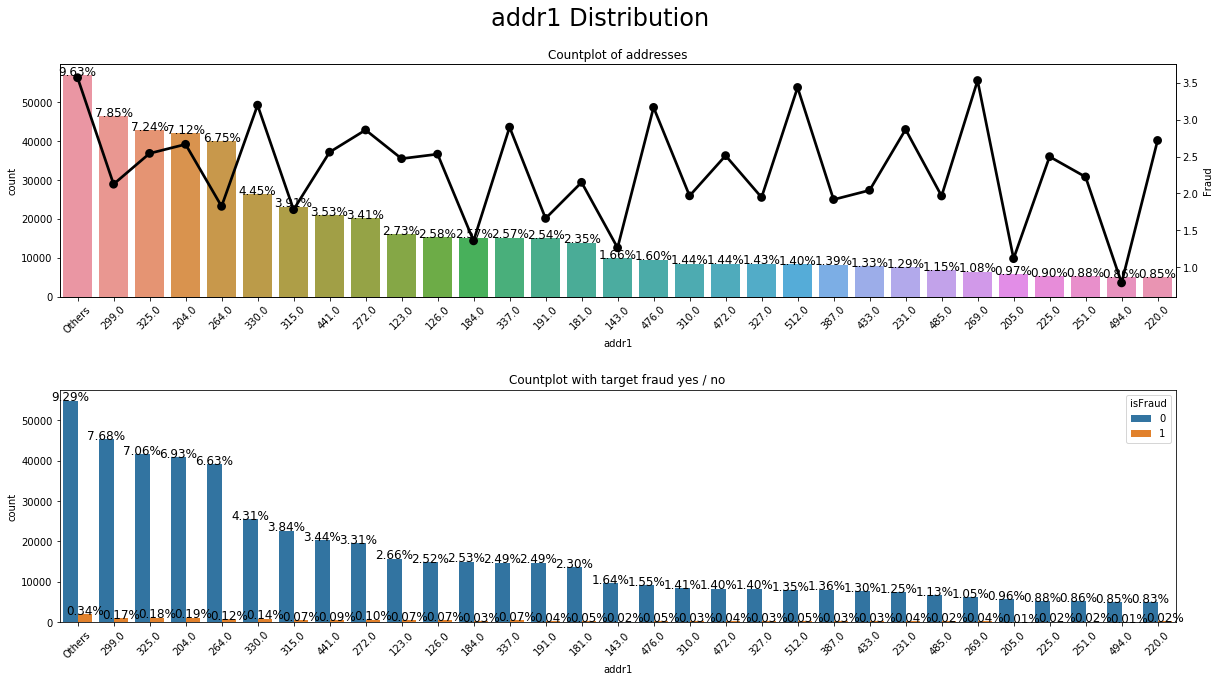

In [336]:
plot_cnt_distribution(df_transaction, 'addr1')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


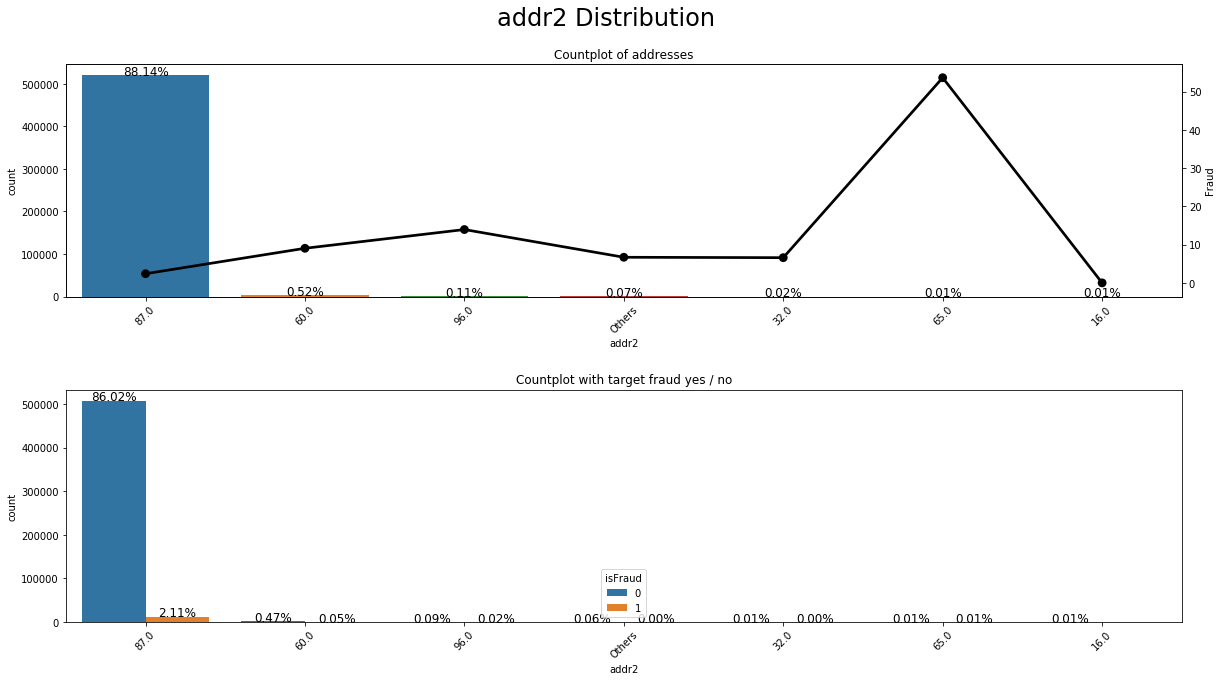

In [337]:
plot_cnt_distribution(df_transaction, 'addr2')

## Dist 1 & Dist 2 Col

- Not sure what these columns are

In [346]:
df_transaction[["dist1", "dist2"]].head()

,dist1,dist2
0,19.0,NaN
1,NaN,NaN
2,287.0,NaN
3,NaN,NaN
4,NaN,NaN


In [345]:
df_transaction[["dist1", "dist2"]].describe()

,dist1,dist2
count,238269.000000,37627.000000
mean,118.502180,231.855423
std,371.872026,529.053494
min,0.000000,0.000000
25%,3.000000,7.000000
50%,8.000000,37.000000
75%,24.000000,206.000000
max,10286.000000,11623.000000


In [347]:
df_transaction[["dist1", "dist2"]].isna().sum()

dist1    352271
dist2    552913
dtype: int64

In [349]:
df_transaction[["dist1", "dist2"]].fillna(-1, inplace=True)

/home/sandro/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


## E-Mail column

- Categorical varilable with e-mail provider
- Most common google, yahoo, no information

In [338]:
# Merge some e-mail providers together
df_transaction.loc[df_transaction['P_emaildomain'].isin(['gmail.com', 'gmail']),'P_emaildomain'] = 'Google'

df_transaction.loc[df_transaction['P_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                         'yahoo.co.jp', 'yahoo.de', 'yahoo.fr','yahoo.es']), 'P_emaildomain'] = 'Yahoo Mail'

df_transaction.loc[df_transaction['P_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                             'outlook.es', 'live.com', 'live.fr','hotmail.fr']), 'P_emaildomain'] = 'Microsoft'

df_transaction.loc[df_transaction.P_emaildomain.isin(df_transaction.P_emaildomain\
                                                     .value_counts()[df_transaction.P_emaildomain.value_counts() <= 500 ].index),'P_emaildomain'] = "Others"

df_transaction.P_emaildomain.fillna("NoInf", inplace=True)

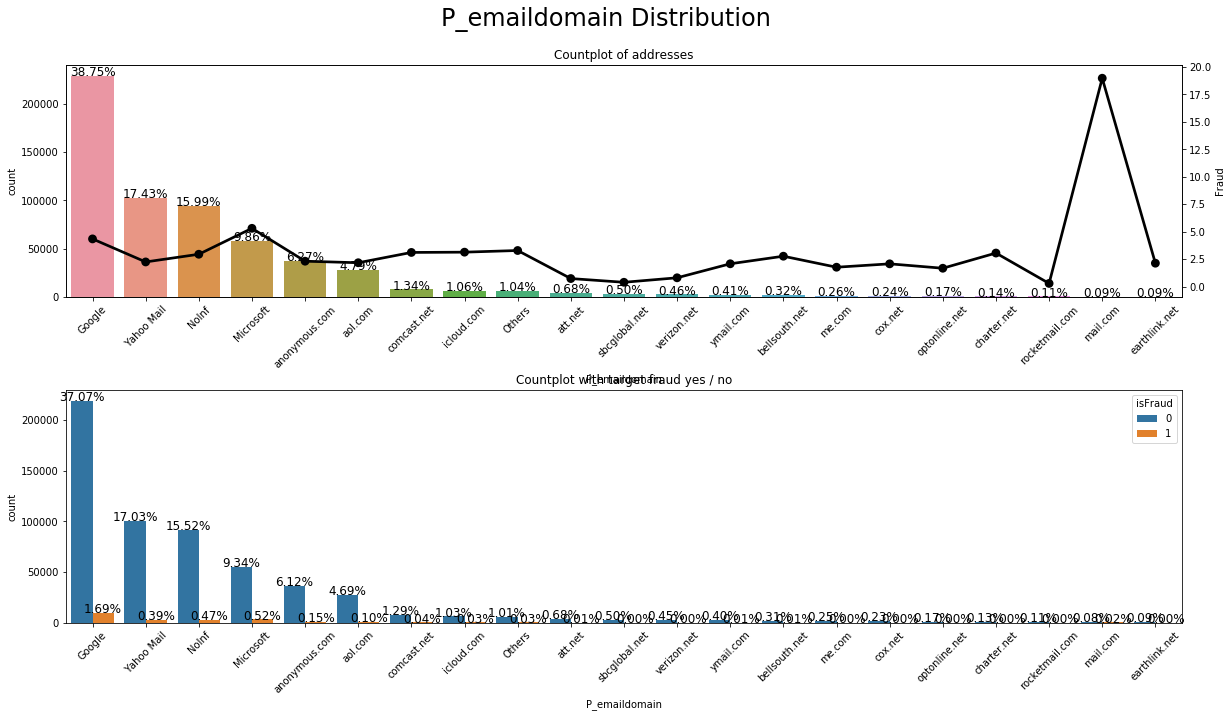

In [339]:
plot_cnt_distribution(df_transaction, 'P_emaildomain')

__From mail.com are almost 20% fraud!__

## R_emaildomain

In [358]:
df_transaction.R_emaildomain.describe()

count        137291
unique           60
top       gmail.com
freq          57147
Name: R_emaildomain, dtype: object

In [359]:
# Merge some e-mail providers together
df_transaction.loc[df_transaction['R_emaildomain'].isin(['gmail.com', 'gmail']),'R_emaildomain'] = 'Google'

df_transaction.loc[df_transaction['R_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                         'yahoo.co.jp', 'yahoo.de', 'yahoo.fr','yahoo.es']), 'R_emaildomain'] = 'Yahoo Mail'

df_transaction.loc[df_transaction['R_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                             'outlook.es', 'live.com', 'live.fr','hotmail.fr']), 'R_emaildomain'] = 'Microsoft'

df_transaction.loc[df_transaction.R_emaildomain.isin(df_transaction.R_emaildomain\
                                                     .value_counts()[df_transaction.R_emaildomain.value_counts() <= 300 ].index),'R_emaildomain'] = "Others"

df_transaction.R_emaildomain.fillna("NoInf", inplace=True)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


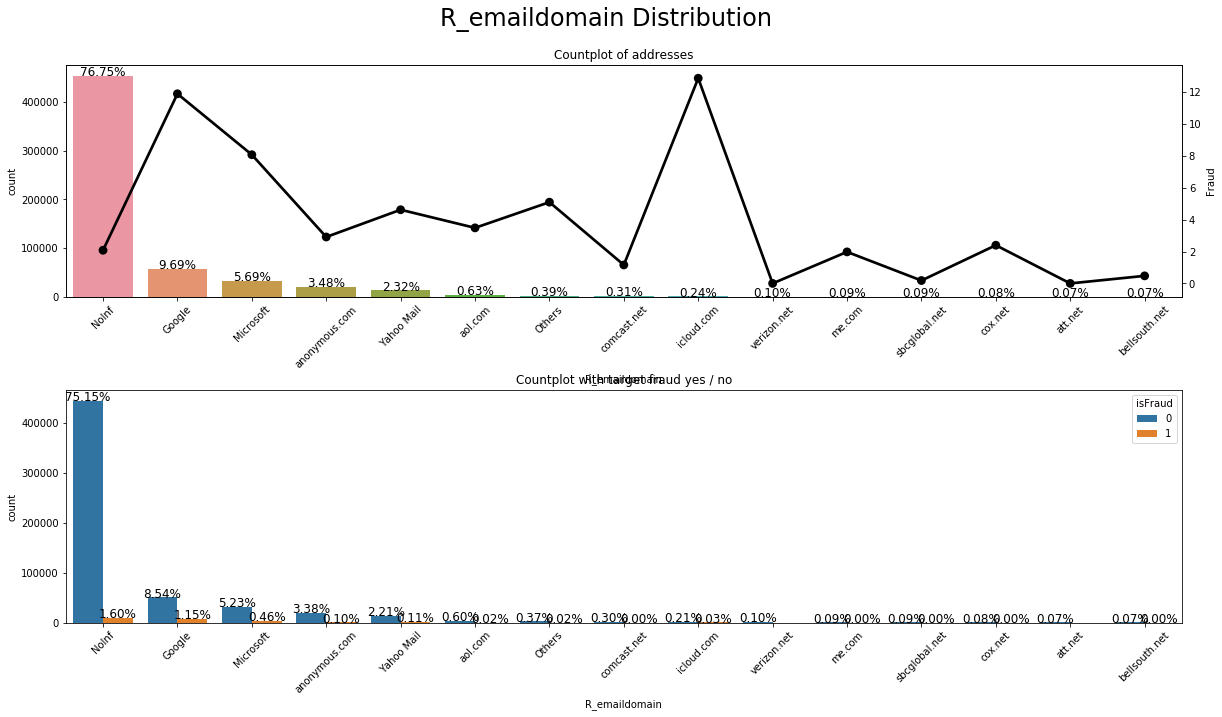

In [360]:
plot_cnt_distribution(df_transaction, 'R_emaildomain')

## C1-C14 cols

In [362]:
df_transaction.loc[:, 'C1': 'C14'].head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


In [363]:
df_transaction.loc[:, 'C1': 'C14'].describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,5.144574,4.480240,5.240343,10.241521,4.076227,32.539918,8.295215
std,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,95.378574,16.674897,95.581443,94.336292,86.666218,129.364844,49.544262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000
75%,3.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,12.000000,2.000000
max,4685.000000,5691.000000,26.000000,2253.000000,349.000000,2253.000000,2255.000000,3331.000000,210.000000,3257.000000,3188.000000,3188.000000,2918.000000,1429.000000


In [368]:
resumetable(df_transaction.loc[:, 'C1': 'C14'])

Dataset Shape: (590540, 14)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,C1,float64,0,1657,1.0,1.0,1.0,2.72
1,C2,float64,0,1216,1.0,1.0,1.0,2.75
2,C3,float64,0,27,0.0,0.0,0.0,0.04
3,C4,float64,0,1260,0.0,0.0,0.0,1.12
4,C5,float64,0,319,0.0,0.0,0.0,2.06
5,C6,float64,0,1328,1.0,1.0,1.0,2.52
6,C7,float64,0,1103,0.0,0.0,0.0,0.71
7,C8,float64,0,1253,0.0,0.0,0.0,1.25
8,C9,float64,0,205,1.0,0.0,1.0,2.62
9,C10,float64,0,1231,0.0,0.0,0.0,1.23


### C1

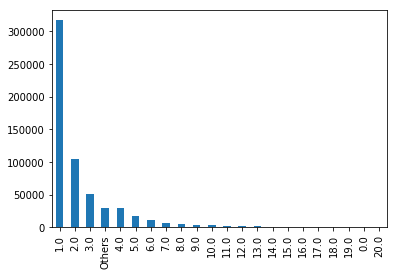

In [374]:
# C1
df_transaction.C1.value_counts().plot(kind="bar")

In [372]:
df_transaction.loc[df_transaction.C1.isin(df_transaction.C1\
                              .value_counts()[df_transaction.C1.value_counts() <= 400 ]\
                              .index), 'C1'] = "Others"

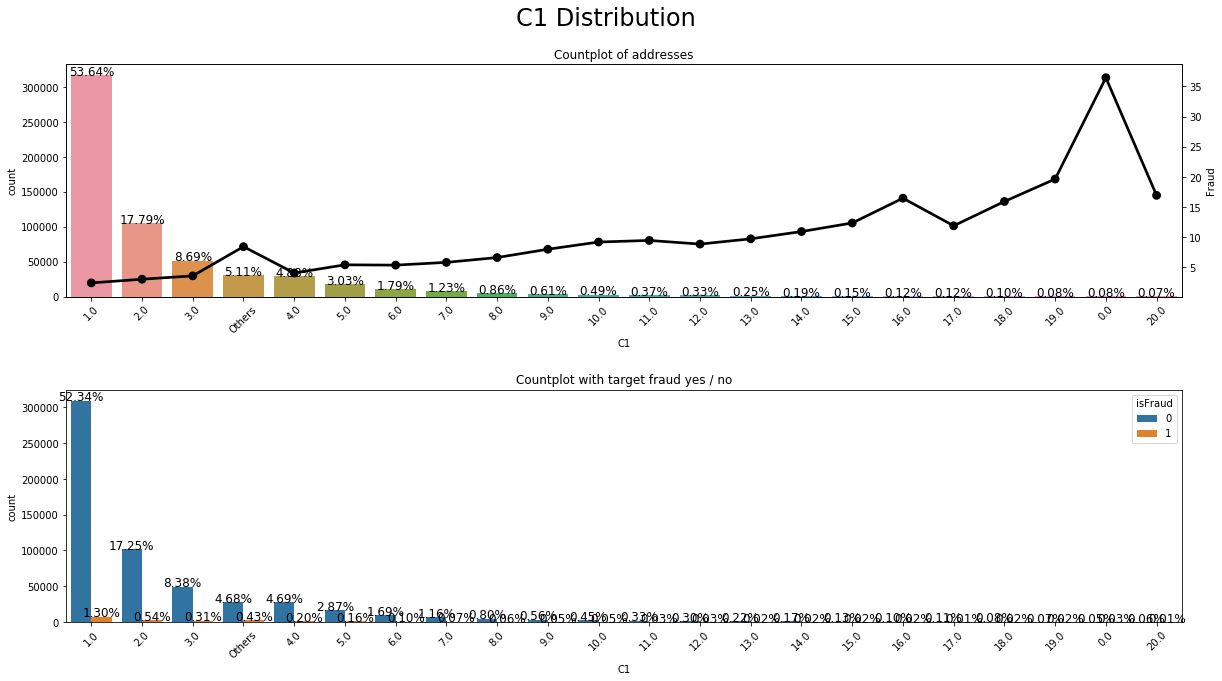

In [375]:
# C1 distribution
plot_cnt_distribution(df_transaction, "C1");

In [377]:
df_transaction.loc[df_transaction.C2.isin(df_transaction.C2\
                              .value_counts()[df_transaction.C2.value_counts() <= 400 ]\
                              .index), 'C2'] = "Others"

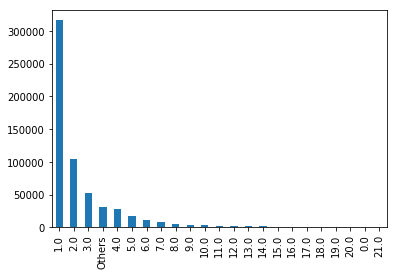

In [378]:
#C2
df_transaction.C2.value_counts().plot(kind="bar")

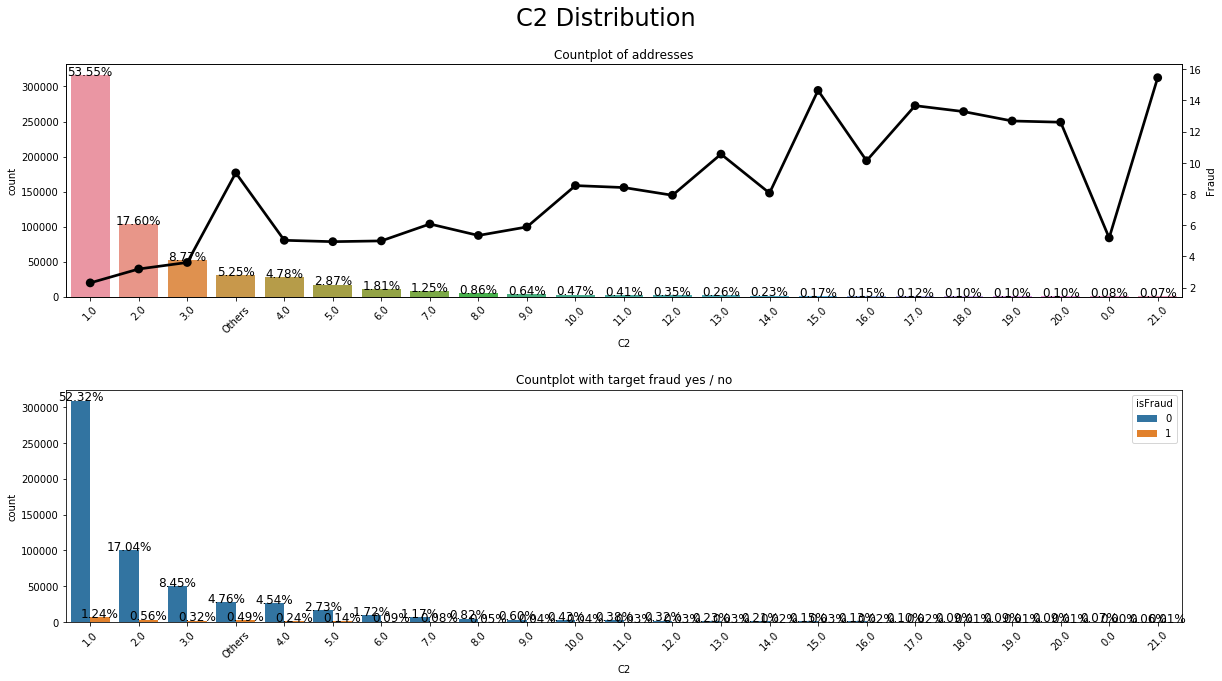

In [379]:
plot_cnt_distribution(df_transaction, "C2");